In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFAutoModel
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../capstone/datasets/input_data_after_data_for_dl__with_augmentation_knn_round2.csv')


In [3]:
df.head()

,Unnamed: 0,Combined Description Cleaned,Assignment group
0,0,login issue user manager name checked the name...,GRP_0
1,1,outlook received from hello team my are not in...,GRP_0
2,2,cannot log in to received from hi i cannot on ...,GRP_0
3,3,unable to access tool page,GRP_0
4,4,error,GRP_0


In [4]:
len(df)

31159

In [5]:
seqlen = df['Combined Description Cleaned'].apply(lambda x:len(x.split()))

In [6]:
#seqlen

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Combined Description Cleaned', ylabel='Density'>

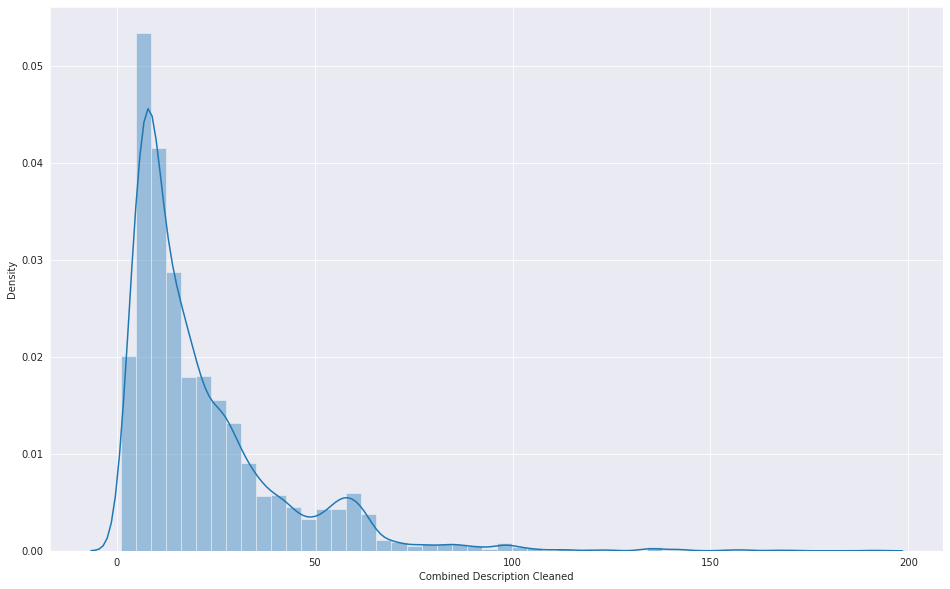

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [9]:
SEQ_LEN=100

In [10]:
from transformers import AutoTokenizer

In [11]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [12]:
tokens = tokenizer.encode_plus("hello world", max_length=SEQ_LEN,truncation=True, padding="max_length",
                              add_special_tokens=True, return_token_type_ids=False,
                              return_attention_mask=True, return_tensors='tf')

In [13]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
Xids = np.zeros((len(df),SEQ_LEN))
Xmask = np.zeros((len(df),SEQ_LEN))

In [15]:
Xids.shape

(31159, 100)

In [16]:
Xmask.shape

(31159, 100)

In [17]:
for i,sequence in enumerate(df['Combined Description Cleaned']):
    tokens = tokenizer.encode_plus(sequence, max_length=SEQ_LEN,truncation=True, padding="max_length",
                              add_special_tokens=True, return_token_type_ids=False,
                              return_attention_mask=True, return_tensors='tf')
    Xids[i,:], Xmask[i,:] = tokens['input_ids'],tokens['attention_mask']

In [18]:
Xids.shape

(31159, 100)

In [19]:
Xmask.shape

(31159, 100)

In [20]:
df['Assignment group'].unique

<bound method Series.unique of 0         GRP_0
1         GRP_0
2         GRP_0
3         GRP_0
4         GRP_0
          ...  
31154     GRP_8
31155     GRP_8
31156    GRP_25
31157    GRP_25
31158    GRP_25
Name: Assignment group, Length: 31159, dtype: object>

In [21]:
df2 = df
le = preprocessing.LabelEncoder()
df2["Assignment group by number"] = le.fit_transform(df["Assignment group"])
y_classes_len = len(le.classes_)
print(le.classes_)
print(y_classes_len)
df2["Assignment group by number"]

['GRP_0' 'GRP_1' 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15'
 'GRP_16' 'GRP_17' 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22'
 'GRP_23' 'GRP_24' 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_3'
 'GRP_30' 'GRP_31' 'GRP_32' 'GRP_33' 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37'
 'GRP_38' 'GRP_39' 'GRP_4' 'GRP_40' 'GRP_41' 'GRP_42' 'GRP_43' 'GRP_44'
 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49' 'GRP_5' 'GRP_50' 'GRP_51'
 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57' 'GRP_58' 'GRP_59'
 'GRP_6' 'GRP_60' 'GRP_61' 'GRP_62' 'GRP_63' 'GRP_64' 'GRP_65' 'GRP_66'
 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_7' 'GRP_70' 'GRP_71' 'GRP_72' 'GRP_73'
 'GRP_8' 'GRP_9']
74


0         0
1         0
2         0
3         0
4         0
         ..
31154    72
31155    72
31156    18
31157    18
31158    18
Name: Assignment group by number, Length: 31159, dtype: int64

In [22]:
df

,Unnamed: 0,Combined Description Cleaned,Assignment group,Assignment group by number
0,0,login issue user manager name checked the name...,GRP_0,0
1,1,outlook received from hello team my are not in...,GRP_0,0
2,2,cannot log in to received from hi i cannot on ...,GRP_0,0
3,3,unable to access tool page,GRP_0,0
4,4,error,GRP_0,0
...,...,...,...,...
31154,14761,job eu tool notch in job regular at sent from,GRP_8,72
31155,14762,job eu tool notch place job regular at receive...,GRP_8,72
31156,14763,multiple login received from hello is with the...,GRP_25,18
31157,14764,multiple login received from hello is with the...,GRP_25,18


In [23]:
arr = df['Assignment group by number'].values
arr.size

31159

In [24]:
labels = np.zeros((arr.size, arr.max()+1))
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
labels[np.arange(arr.size),arr] = 1
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
with open('datasets/xids.npy', 'wb') as f:
    np.save(f,Xids)
with open('datasets/xmask.npy', 'wb') as f:
    np.save(f,Xmask)
with open('datasets/labels.npy', 'wb') as f:
    np.save(f,labels)
del df, Xids, Xmask, labels

In [27]:
with open('datasets/xids.npy', 'rb') as f:
    Xids = np.load(f)
with open('datasets/xmask.npy', 'rb') as f:
    Xmask = np.load(f)
with open('datasets/labels.npy', 'rb') as f:
    labels = np.load(f)

In [28]:
Xids

array([[  101.,  9366.,  1394., ...,     0.,     0.,     0.],
       [  101., 25059.,  1460., ...,     0.,     0.,     0.],
       [  101.,  2834.,  9366., ...,     0.,     0.,     0.],
       ...,
       [  101.,  2967.,  9366., ...,     0.,     0.,     0.],
       [  101.,  2967.,  9366., ...,     0.,     0.,     0.],
       [  101.,  2967.,  9366., ...,     0.,     0.,     0.]])

In [29]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [32]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([  101.,  9366.,  1394.,  2486.,  4795.,  2618.,  1271.,  6488.,
        1103.,  1271.,  1107.,  8050.,  1105.,  1231.,  9388., 25241.,
        9213.,  1106.,  4031., 25780.,  3659.,  1115.,  1119.,  1108.,
        1682.,  9366.,  1394.,  2486., 10456.,   102.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])>, <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.

In [33]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [34]:
dataset = dataset.map(map_func)

In [35]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([  101.,  9366.,  1394.,  2486.,  4795.,  2618.,  1271.,  6488.,
        1103.,  1271.,  1107.,  8050.,  1105.,  1231.,  9388., 25241.,
        9213.,  1106.,  4031., 25780.,  3659.,  1115.,  1119.,  1108.,
        1682.,  9366.,  1394.,  2486., 10456.,   102.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(100,),

In [36]:
dataset = dataset.shuffle(100000).batch(32)

In [37]:
DS_LEN = len(list(dataset))

In [38]:
DS_LEN

974

In [39]:
SPLIT=0.9
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))
del dataset

In [40]:
bert =  TFAutoModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [41]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask',dtype='int32')
embeddings = bert(input_ids, attention_mask=mask)[0]
X= tf.keras.layers.GlobalMaxPool1D()(embeddings)
X= tf.keras.layers.BatchNormalization()(X)
X= tf.keras.layers.Dense(128, activation='relu')(X)
X= tf.keras.layers.Dropout(0.1)(X)
X= tf.keras.layers.Dense(32, activation='relu')(X)
y= tf.keras.layers.Dense(74,activation='softmax', name='outputs')(X)
model = tf.keras.Model(inputs=[input_ids, mask],outputs=y)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [42]:

model.layers[2].trainable=False
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tf_bert_model[0][0]          

In [43]:
optimizer = tf.keras.optimizers.RMSprop()
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [44]:
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [45]:
def reduce_learning_rate_on_plateaue(patience=3,monitor='val_loss',mode='min'):
    #reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.3, patience=patience,
    #                                                 mode=mode, verbose=1)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
                                  factor=0.1, 
                                  patience=10, 
                                  verbose=1, 
                                  mode=mode, 
                                  min_delta=0.0001, 
                                  cooldown=5, 
                                  min_lr=1e-6)
    return reduce_lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-3 * 10**(epoch / 10))


def get_early_stopping(patience=3,monitor='val_loss',mode='min'):
    """
    This function should return an EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    HINT: use the EarlyStopping callback with the correct 'monitor' and 'patience'
    """
    return tf.keras.callbacks.EarlyStopping(
        monitor=monitor,  patience=patience, verbose=1, mode=mode
    )   

In [46]:
early_stopping = get_early_stopping(monitor='val_loss', mode='min',patience=5)
reduce_lr = reduce_learning_rate_on_plateaue(monitor='val_loss', mode='min', patience=5)

In [47]:
history = model.fit(train, validation_data=val, epochs=100, verbose=1,
                    callbacks=[ 
                            reduce_lr #,
                            #early_stopping
                            ])

Epoch 1/100
877/877 [==============================] - 60s 62ms/step - loss: 3.1073 - accuracy: 0.2427 - val_loss: 2.0149 - val_accuracy: 0.4585
Epoch 2/100
877/877 [==============================] - 54s 62ms/step - loss: 2.2843 - accuracy: 0.3985 - val_loss: 1.6561 - val_accuracy: 0.5532
Epoch 3/100
877/877 [==============================] - 57s 65ms/step - loss: 2.0433 - accuracy: 0.4524 - val_loss: 1.4664 - val_accuracy: 0.6036
Epoch 4/100
877/877 [==============================] - 58s 66ms/step - loss: 1.8915 - accuracy: 0.4888 - val_loss: 1.3373 - val_accuracy: 0.6281
Epoch 5/100
877/877 [==============================] - 58s 66ms/step - loss: 1.8026 - accuracy: 0.5068 - val_loss: 1.2479 - val_accuracy: 0.6485
Epoch 6/100
877/877 [==============================] - 58s 66ms/step - loss: 1.7167 - accuracy: 0.5269 - val_loss: 1.0973 - val_accuracy: 0.6901
Epoch 7/100
877/877 [==============================] - 58s 66ms/step - loss: 1.6767 - accuracy: 0.5357 - val_loss: 1.0363 - val_ac

# Print the classification accuracy metrics

In [61]:
def get_evaluation_accuracy(model, val):
    """Test model classification accuracy"""
    eval_loss, eval_acc = model.evaluate(val, verbose=0)
    print('Evaluation Accuracy: {acc:0.3f}'.format(acc=eval_acc))
    print('Evaluation Loss: {acc:0.3f}'.format(acc=eval_loss))

    
#Function to plot accuracy
def plot_accuracy(history):
  try:
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
  except KeyError:
      plt.plot(history.history['acc'])
      plt.plot(history.history['val_acc'])
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show() 

#Function to plot loss
def plot_loss(history, scale=1):
  try:
      plt.plot(history.history['loss'])
      plt.plot( [x / scale for x in history.history['val_loss']] )
  except KeyError:
      plt.plot(history.history['loss'])
      plt.plot([x / scale for x in history.history['val_loss']] )
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show() 

def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

#Function to plot the confusion matrix that will be called at the end of each epoch
#The confusion matrix will be visible in the Tensor Board  
class_names=['0','1','2','3','4','5','6','7','8','9']
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Normalize the confusion matrix.
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model1.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

def print_values(history):
  print("Mean Accuracy for the validation dataset: ")
  print(np.array(history.history['val_accuracy']).mean())
  print("Mean Loss for the validation dataset: ")
  print(np.array(history.history['val_loss']).mean())
  print("Mean Accuracy for the training dataset: ")
  print(np.array(history.history['accuracy']).mean())
  print("Mean Loss for the training dataset: ")
  print(np.array(history.history['loss']).mean())

def print_results(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_train_pred = model.predict(X_train)
    y_train_pred = np.argmax(y_train_pred, axis=1)
    
    print('Prediction Model:', model)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    #print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)
    
    
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)
    print('-'*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

def print_scores(model,val):
    y_pred = model.predict(val)
    y_pred = np.argmax(y_pred, axis=1)
    precision = precision_score(val, y_pred, average='weighted')
    print('Precision: %f' % precision)
    recall = recall_score(val, y_pred, average='weighted')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(val, y_pred, average='weighted')
    print('F1 score: %f' % f1)
    print('-'*80)

    
def print_classification_report(model,val):
    y_pred = model.predict(val)
    y_pred = np.argmax(y_pred, axis=1)
    print('Classification report:\n %s' % (classification_report(val, y_pred)))

    
def print_confusion_matrix(model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)  
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)


In [55]:
get_evaluation_accuracy(model,val)

Evaluation Accuracy: 0.864
Evaluation Loss: 0.475


In [56]:
print_values(history)

Mean Accuracy for the validation dataset: 
0.8167302113771439
Mean Loss for the validation dataset: 
0.6493391236662864
Mean Accuracy for the training dataset: 
0.6322445100545884
Mean Loss for the training dataset: 
1.3612296533584596


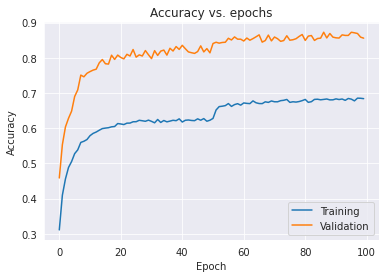

In [57]:
plot_accuracy(history)

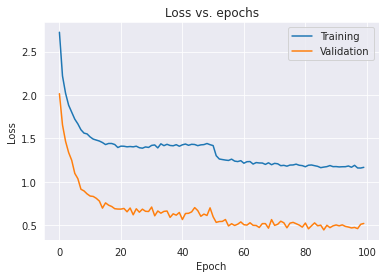

In [58]:
plot_loss(history)

In [68]:
bert_model = model

In [69]:
from tensorflow.keras.models import Sequential, save_model, load_model

# Save the model
filepath = '../capstone/saved_models'
save_model(bert_model, filepath)

INFO:tensorflow:Assets written to: ../capstone/saved_models/assets


INFO:tensorflow:Assets written to: ../capstone/saved_models/assets
